# Комаров Дмитрий Сергеевич ИУ5-63Б

*   Вариант 8
*   Задание 1
*   Датасет 8


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

%matplotlib inline

In [3]:
data = pd.read_csv("sample_data/HousingData.csv")

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Уберем нулевые значения

In [6]:
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
data.fillna(data.mean(), inplace=True)

In [8]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Построю box-plot диаграмму

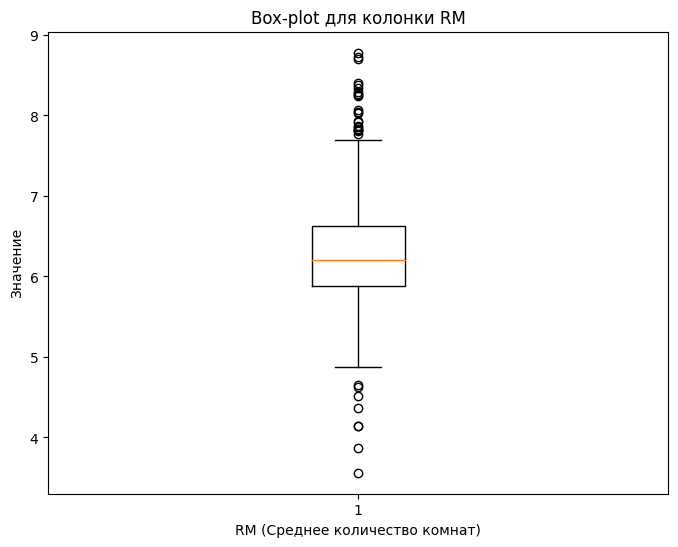

In [9]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['RM'])
plt.title('Box-plot для колонки RM')
plt.xlabel('RM (Среднее количество комнат)')
plt.ylabel('Значение')
plt.show()

# Корреляционный анализ

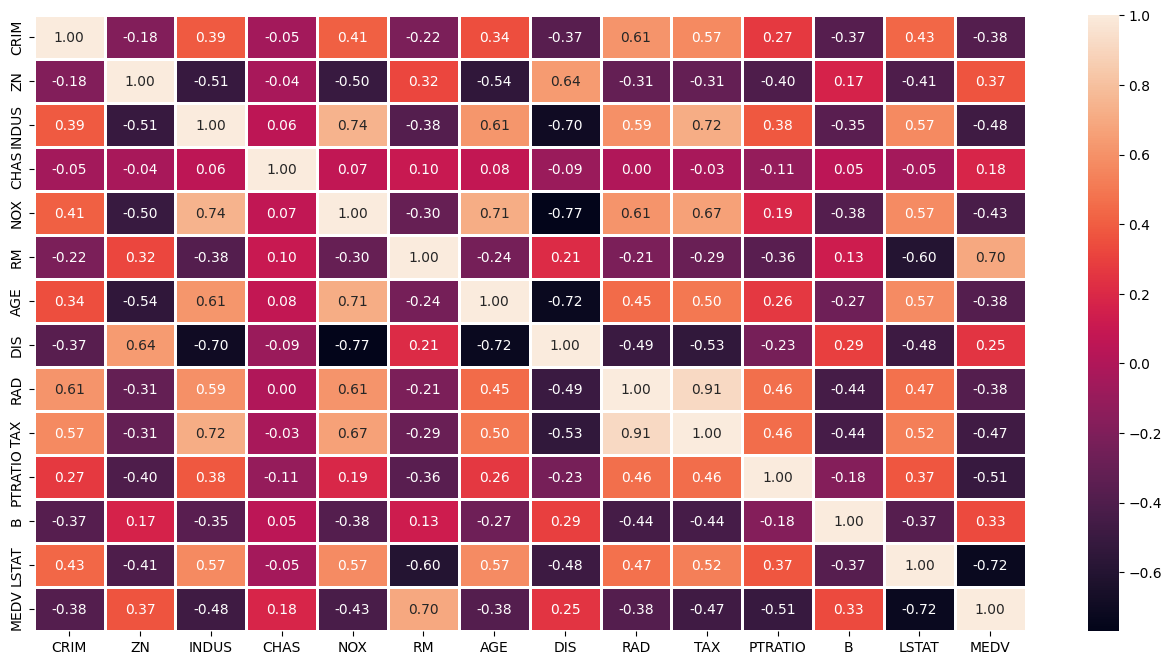

In [10]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(data.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

Видим прямую взаимосвязь между кол-вом комнат и средней ценой MEDV. Также отрицательную между LSTAT (низким социальным статусом) и средней ценой.

# Проведу анализ на нахождение мультиколлинеарных переменных

In [12]:
data_with_const = add_constant(data)

vif_data = pd.DataFrame()
vif_data["Feature"] = data_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data_with_const.shape[1])]

print(vif_data)

    Feature         VIF
0     const  630.471114
1      CRIM    1.762154
2        ZN    2.214234
3     INDUS    3.633154
4      CHAS    1.091950
5       NOX    4.388337
6        RM    2.225136
7       AGE    2.746628
8       DIS    4.209024
9       RAD    7.622095
10      TAX    9.022070
11  PTRATIO    1.991673
12        B    1.386608
13    LSTAT    3.127608
14     MEDV    3.723153


In [13]:
data_except_tax = data_with_const.drop(columns=['TAX'])

vif_data = pd.DataFrame()
vif_data["Feature"] = data_except_tax.columns
vif_data["VIF"] = [variance_inflation_factor(data_except_tax.values, i) for i in range(data_except_tax.shape[1])]

print(vif_data)


    Feature         VIF
0     const  621.160998
1      CRIM    1.759951
2        ZN    2.098799
3     INDUS    2.996814
4      CHAS    1.081359
5       NOX    4.364335
6        RM    2.224756
7       AGE    2.743957
8       DIS    4.208811
9       RAD    2.860464
10  PTRATIO    1.988665
11        B    1.386600
12    LSTAT    3.121611
13     MEDV    3.665347


Можем заметить, что самые мультиколлинеарные значения это TAX и RAD. Чтобы избавится от этого можно убрать одну из переменных, например TAX. После его удаление нет таких параметров, которые больше 5, что говорит о отсутствии мультиколлинеарности в модели.